In [1]:
from LIMxCMBL.init import *

In [2]:
inner_dkparp_integral = np.load('/oak/stanford/orgs/kipac/users/delon/LIMxCMBL/inner_dkparp_integral.npy')

In [3]:
from scipy.interpolate import interp1d

In [4]:
# get CMB lensing kernel as a function
_chis = np.linspace(0, chimax, 11234567)
_a_s = ccl.scale_factor_of_chi(cosmo, _chis)
_z_s = 1/_a_s - 1

cmbk = ccl.CMBLensingTracer(cosmo, z_source=1100)
Dz = ccl.growth_factor(cosmo, _a_s)
Wk = cmbk.get_kernel(_chis)[0]

f_WkD = interp1d(_chis, Wk * Dz, 
                 bounds_error = False,
                fill_value='extrapolate')

In [5]:
test_chis = np.linspace(0, 1.5*chimax, 1123)

In [6]:
f_WkD(chimax * 1.2)

array(3.18997148e-05)

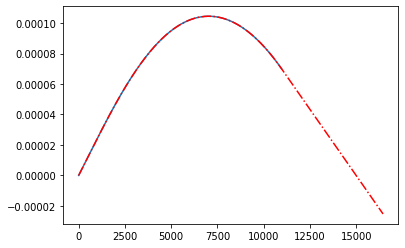

In [7]:
plt.plot(_chis, Wk * Dz)

plt.plot(test_chis, f_WkD(test_chis), 'r-.')

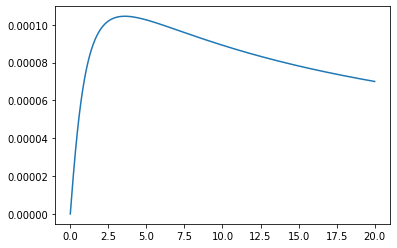

In [8]:
plt.plot(_z_s, Wk * Dz)

In [9]:
chib_idx = 42
ell_idx  = 76

In [10]:
deltas_full = np.concatenate((-deltas[::-1], 
                              [0], 
                              deltas))

In [11]:
from tqdm import trange

In [12]:
from scipy.integrate import quad, quad_vec, trapezoid

In [13]:
oup = np.zeros(len(chibs), dtype = np.float128)
ell  = ells[ell_idx]
for chib_idx in trange(len(chibs)):
    chib = chibs[chib_idx]
    inner_dkarp_integral_full = np.concatenate((inner_dkparp_integral[ell_idx,chib_idx][::-1],
                                            [inner_dkparp_integral[ell_idx,chib_idx,0]],
                                            inner_dkparp_integral[ell_idx][chib_idx]))
    f_integrand = interp1d(x = deltas_full, 
                       y = f_WkD(chib*(1-deltas_full)) * 
                           f_WkD(chib*(1+deltas_full)) / chib**2  * 2 * chib 
                           * inner_dkarp_integral_full)
    oup[chib_idx] = trapezoid(y = f_WkD(chib*(1-deltas_full)) * f_WkD(chib*(1+deltas_full)) / chib**2  * 2 * chib * inner_dkarp_integral_full,
                              x = deltas_full)

100%|██████████| 64/64 [00:00<00:00, 2097.86it/s]


In [14]:
f_dchib_integrand = interp1d(chibs, oup)

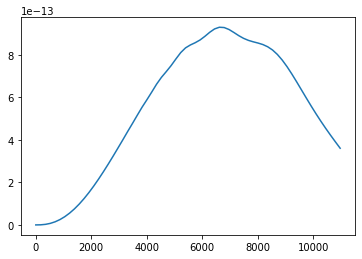

In [18]:
plt.plot(chibs, oup)

In [15]:
quad(f_dchib_integrand, min(chibs), max(chibs),
    epsabs = 0.0, epsrel = 1e-4)

(6.066313041873672e-09, 1.7599602265904432e-13)

In [16]:
from LIMxCMBL.cross_spectrum import d_delta_integral

In [17]:
_oup = d_delta_integral(f_WkD, f_WkD)

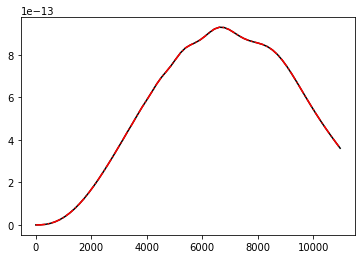

In [20]:
plt.plot(chibs, _oup[ell_idx], 'k')
plt.plot(chibs, oup, 'r-.')

In [28]:
f_dchib_integral = interp1d(x = chibs, y = _oup)
asdf, _ = quad_vec(f_dchib_integral, min(chibs), max(chibs),
               epsabs = 0.0, epsrel = 1e-4)

[]

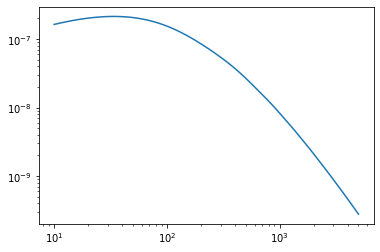

In [30]:
plt.plot(ells, asdf)
plt.loglog()